# Pandas

### Credit, Thanks, and Purpose
To Shashank Kalanithi, whose warmth, courage to err and correct, knowledge, and hours of labor have gone into producing dozens of videos and Notion Documents on data science and analytics, from theory to technique -- all taught masterfully -- thank you.

I produced this notebook as a repository for my own understanding and plan to add to it as I learn more. I hope it might serve a similarly useful pedagogic purpose to others at the beginning of thier Python journey, and that those with greater expertise might correct any errors or misapprehensions they notice to help create a useful set of references that future us will be happy to have.

Much of the fundamentals of this knowledge are based on Shashank's video "Python for Data Scientists and Data Analysts"; I strongly encourage you to support him in any way you can and make use of the explanations, documents, and courses he produces. I have found them to be excellent resources and trust that anyone wanting to brush up on their knowledge or learn the basics will as well.

https://www.youtube.com/watch?v=sZDgJKI8DAM&ab_channel=ShashankKalanithi leads to "Python for Data Scientists and Analysts"

### DataFrames & Imports

In [1]:
# Pandas stands for panel data(s), i.e. tabular or structured data. Built in C. It is a key component of data analysis work
# NOTE: No developer can know the methods and arguments for every library they use. As such, documentation (essentially...
# ... explanations of how things work) can be used in an open-book fashion. For Pandas https://pandas.pydata.org/docs/

import pandas as pd
import os            # os is a library that comes with Python but must be imported: used to get access to more computer functions.

# The core of pandas are DataFrames, which are essentially tables a la Excel, but more powerful and built on stacks of series(plural).
# Series are to columns as lists are to rows; they are in effect lists, enumerated vertically, from top-to-bottom, as seen below:

series_test = list(range(1,101))
print(pd.Series(series_test))

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Length: 100, dtype: int64


In [2]:
cd = os.getcwd() # CD stands for current directory (PWC for MacOS). This varaible is made to later tell Python where to look for files
                  # os.getCurrentWorkingDirectory allows you to specify that the desired directory is the one being used (Python Testing)
                  # This is very useful and important for ensuring that Python can always find the files you need to import.
print(cd)

c:\Users\verda\OneDrive\Desktop\VSC Depot\Python Testing


### Columns

In [3]:
simple_frame = cd + "/simple_csv.csv" # Creates the specific directory path: current directroy -> the desired file (simple_csv in this case)

import_one = pd.read_csv(simple_frame, nrows= 11) # This uses Pandas to read out the CSV (comma separated values) at the end of the directory path
                         # pd.read_csv() has many possible arguments (read docu) (... , nrows = x)"" is used like a SQL Limit
import_one # In this case, it's better not to print() because Python renders an uglier version of the data.

,Column1,Column2,Column3
0,0.280925,0.910368,0.692982
1,0.719882,0.210024,0.761276
2,0.235752,0.059796,0.154667
3,0.603366,0.485614,0.013345
4,0.039985,0.236359,0.811832
5,0.015478,0.543641,0.112719
6,0.192540,0.409874,0.875082
7,0.380921,0.045468,0.515859
8,0.592471,0.786421,0.047249
9,0.072112,0.695694,0.409573


In [4]:
# Imported DataFrames (like the one above; a stack of series) can be manipulated. Ex.:

import_one["Column1"]  # Here, Column1 is called. The brackets, however, don't denote a list, and so only one value may exist inside

0     0.280925
1     0.719882
2     0.235752
3     0.603366
4     0.039985
5     0.015478
6     0.192540
7     0.380921
8     0.592471
9     0.072112
10    0.898072
Name: Column1, dtype: float64

In [5]:
# New columns can easily be added to DataFrames and otherwise manipulated;

import_one["Column_New1"] = 1 # If set equal to a constant, that constant will be placed in every row of the new column
import_one["Column_New2"] = list(range(11)) # If given a list, the list will be sequentially added to each subsequent row
import_one["Added_Columns"] = import_one["Column_New1"] + import_one["Column_New2"] # The values of both columns are added
import_one

,Column1,Column2,Column3,Column_New1,Column_New2,Added_Columns
0,0.280925,0.910368,0.692982,1,0,1
1,0.719882,0.210024,0.761276,1,1,2
2,0.235752,0.059796,0.154667,1,2,3
3,0.603366,0.485614,0.013345,1,3,4
4,0.039985,0.236359,0.811832,1,4,5
5,0.015478,0.543641,0.112719,1,5,6
6,0.192540,0.409874,0.875082,1,6,7
7,0.380921,0.045468,0.515859,1,7,8
8,0.592471,0.786421,0.047249,1,8,9
9,0.072112,0.695694,0.409573,1,9,10


In [6]:
# To "Drop" a column is essentially to delete it -- a term used in relational databases

# NOTE: the below comment is code that performs the same function as the active code
# import_one = import_one.drop(columns="Added_Columns") 

# In Pandas as in all code, there are many ways to achieve the same result:
import_one.drop(columns="Added_Columns", inplace=True) # inplace=True (the default is =False), will run the method on the selected...
# DataFrame without having to write "import_one=import_one.drop()" NOTE: IT IS FROWNED UPON, endeavor to avoid it. Run this instead:
# import_one = import_one.drop("Added_Columns")
import_one

,Column1,Column2,Column3,Column_New1,Column_New2
0,0.280925,0.910368,0.692982,1,0
1,0.719882,0.210024,0.761276,1,1
2,0.235752,0.059796,0.154667,1,2
3,0.603366,0.485614,0.013345,1,3
4,0.039985,0.236359,0.811832,1,4
5,0.015478,0.543641,0.112719,1,5
6,0.192540,0.409874,0.875082,1,6
7,0.380921,0.045468,0.515859,1,7
8,0.592471,0.786421,0.047249,1,8
9,0.072112,0.695694,0.409573,1,9


### Rows

In [7]:
# Pandas is meant to primarily operate on columns, as such rows are harder to manipulate than columns.

# the .loc Pandas method allows you to specify which range of rows you want, with an optional argument to specify columns also
# loc also includes the index numbers of each row
# NOTE: .iloc also exists. Instead of a specific column list, it uses column indexing (column indexes change often), not very useful

import_one.loc[5:11, ["Column1","Column2","Column3"]] # <- there are two arguments: desired row range AND a column list

,Column1,Column2,Column3
5,0.015478,0.543641,0.112719
6,0.192540,0.409874,0.875082
7,0.380921,0.045468,0.515859
8,0.592471,0.786421,0.047249
9,0.072112,0.695694,0.409573
10,0.898072,0.070956,0.209020


### Real World Data, Simple Methods, and Complex Pandas

In [8]:
netflix_frame = cd + "/netflix_titles.csv"
import_two = pd.read_csv(netflix_frame)
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [9]:
import_two.columns # Shows all columns in selected file, useful for when there are many columns

# This creates an index object, which is similar but not the same as a list: good practice to make it a list for readability:

list(import_two.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [10]:
import_two.describe() # This gives a quick statistical description of any numerical columsn present in the dataframe

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [11]:
import_two.corr() # This measures the Pearson's correlation coefficient of different varaibles. Because there is only one numerical
# column, there is no insightful measurement

C:\Users\verda\AppData\Local\Temp\ipykernel_3512\1835255681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  import_two.corr() # This measures the Pearson's correlation coefficient of different varaibles. Because there is only one numerical


,release_year
release_year,1.0


In [12]:
import_two["type"].unique # In the brackets specify the column which .unique will show the unique values for

<bound method Series.unique of 0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7782      Movie
7783      Movie
7784      Movie
7785    TV Show
7786      Movie
Name: type, Length: 7787, dtype: object>

In [13]:
#Filtering data by result can be done through a process known as boolean masking, as follows;

import_two[import_two["country"] == "Sweden"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1042,s1043,TV Show,Bonus Family,NaN,"Vera Vitali, Erik Johansson, Fredrik Hallgren,...",Sweden,"July 12, 2019",2019,TV-MA,3 Seasons,"International TV Shows, TV Dramas","A new couple, their exes and their children na..."
1178,s1179,TV Show,Caliphate,NaN,"Aliette Opheim, Gizem Erdogan, Amed Bozan, Alb...",Sweden,"March 18, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",An impending ISIS attack on Sweden entangles a...
1634,s1635,Movie,David Batra: Elefanten i rummet,"David Batra, Jon Rudberg",David Batra,Sweden,"April 1, 2020",2020,TV-MA,77 min,Stand-Up Comedy,Swedish comedian David Batra gets personal as ...
2098,s2099,TV Show,Fallet,NaN,"Lisa Henni, Adam Godley, Tomas von Brömssen, L...",Sweden,"April 1, 2018",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Com...",A Swedish detective and her timid British coll...
2376,s2377,TV Show,Gentlemen and Gangsters,NaN,"David Dencik, Ruth Vega Fernandez, David Fukam...",Sweden,"June 1, 2016",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Romant...","Now on the run, a writer relates his previous ..."
3108,s3109,Movie,Jag älskar dig: En skilsmässokomedi,Johan Brisinger,"Björn Kjellman, Christine Meltzer, Rodolfo Cor...",Sweden,"March 15, 2018",2016,TV-MA,91 min,"Comedies, Dramas, International Movies","Tired of her passionless marriage, Marianne wa..."
3741,s3742,TV Show,Love & Anarchy,NaN,"Ida Engvoll, Björn Mosten, Carla Sehn, Reine B...",Sweden,"November 4, 2020",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A married consultant and a young IT tech kick ...
5040,s5041,TV Show,Quicksand,NaN,"Hanna Ardéhn, Felix Sandman, William Spetz, El...",Sweden,"April 5, 2019",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a tragedy at a school sends shock waves ...
6048,s6049,Movie,The 101-Year-Old Man Who Skipped Out on the Bi...,"Felix Herngren, Måns Herngren","Robert Gustafsson, Jens Hultén, Caroline Boult...",Sweden,"April 25, 2017",2016,TV-MA,108 min,"Comedies, International Movies","In need of money, an eccentric ex-spy and his ..."
6686,s6687,TV Show,The Most Beautiful Hands of Delhi,NaN,"Björn Kjellman, Joy Sengupta, Natasha Jayetileke",Sweden,"July 20, 2017",2017,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas","A stalled career, failed marriage and receding..."


In [14]:
# As with the previous application of conditions, several can be filtered for at once. The ampersand (&) means AND -> both must be true
# The ampersand is a bitwise operator that stands for AND. OR is represented by a pipe | (shift + backslash)


import_two[(import_two["country"] == "Sweden") & (import_two["rating"] == "TV-MA")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1042,s1043,TV Show,Bonus Family,NaN,"Vera Vitali, Erik Johansson, Fredrik Hallgren,...",Sweden,"July 12, 2019",2019,TV-MA,3 Seasons,"International TV Shows, TV Dramas","A new couple, their exes and their children na..."
1178,s1179,TV Show,Caliphate,NaN,"Aliette Opheim, Gizem Erdogan, Amed Bozan, Alb...",Sweden,"March 18, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",An impending ISIS attack on Sweden entangles a...
1634,s1635,Movie,David Batra: Elefanten i rummet,"David Batra, Jon Rudberg",David Batra,Sweden,"April 1, 2020",2020,TV-MA,77 min,Stand-Up Comedy,Swedish comedian David Batra gets personal as ...
2098,s2099,TV Show,Fallet,NaN,"Lisa Henni, Adam Godley, Tomas von Brömssen, L...",Sweden,"April 1, 2018",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Com...",A Swedish detective and her timid British coll...
2376,s2377,TV Show,Gentlemen and Gangsters,NaN,"David Dencik, Ruth Vega Fernandez, David Fukam...",Sweden,"June 1, 2016",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Romant...","Now on the run, a writer relates his previous ..."
3108,s3109,Movie,Jag älskar dig: En skilsmässokomedi,Johan Brisinger,"Björn Kjellman, Christine Meltzer, Rodolfo Cor...",Sweden,"March 15, 2018",2016,TV-MA,91 min,"Comedies, Dramas, International Movies","Tired of her passionless marriage, Marianne wa..."
3741,s3742,TV Show,Love & Anarchy,NaN,"Ida Engvoll, Björn Mosten, Carla Sehn, Reine B...",Sweden,"November 4, 2020",2020,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A married consultant and a young IT tech kick ...
5040,s5041,TV Show,Quicksand,NaN,"Hanna Ardéhn, Felix Sandman, William Spetz, El...",Sweden,"April 5, 2019",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a tragedy at a school sends shock waves ...
6048,s6049,Movie,The 101-Year-Old Man Who Skipped Out on the Bi...,"Felix Herngren, Måns Herngren","Robert Gustafsson, Jens Hultén, Caroline Boult...",Sweden,"April 25, 2017",2016,TV-MA,108 min,"Comedies, International Movies","In need of money, an eccentric ex-spy and his ..."
6686,s6687,TV Show,The Most Beautiful Hands of Delhi,NaN,"Björn Kjellman, Joy Sengupta, Natasha Jayetileke",Sweden,"July 20, 2017",2017,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas","A stalled career, failed marriage and receding..."


In [15]:
# Using the Pandas method pd.to_datetime, non-standard date-time notation can be converted to YYYY-MM-DD notation.
# by writing import_two["Date_Time"] and equating it to the YYYY-MM-DD notation, a new column called Date_Time is addedd to import_two

import_two["Date_Time"] = pd.to_datetime(import_two["date_added"])
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31


In [16]:
# To find out if a particular series or dataframe has NA values, do the following:

import_two["date_added"]

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [17]:
import_two["date_added"].dropna()   # Notice that the answer shows a length of 7777: 10 less than before. 
                                    # This is because .dropna() dropped 10 NA columns

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7777, dtype: object

In [18]:
# datetime is an inbuilt library in Python. In this case the datetime method (same name as library) is used to fill in NA values
from datetime import datetime as dt

In [19]:
# .fillna method fills in any NA values with a given argument, in this case datatime (dt) is used to fill the NAs with a datetime.

import_two["Date_Time"].fillna(dt(2020, 1, 1), inplace=True)
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31


In [20]:
# Unix time is a manner of storing time down to nanoseconds using only integers. It appears often in databases, and must be known
# See the colum to the far right of the graph.
import_two["Unix_Time"] = import_two["Date_Time"].astype('int64')
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time,Unix_Time
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,1597363200000000000
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,1482451200000000000
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,1545264000000000000
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,1510790400000000000
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1577836800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,1603065600000000000
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,1551484800000000000
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,1600992000000000000
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1604102400000000000


### Splitting Columns & Dealing with Consequences

In [21]:
# Here, we first give two names declared by the [[]] double brackets, and then split the date_added column at the ", ".
# expand=True must be True, as that is what informs Python that the column should indeed be split/expanded.

import_two[["Month_Num","Year_Num"]] = import_two["date_added"].str.split(", ", expand=True)
import_two


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time,Unix_Time,Month_Num,Year_Num
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,1597363200000000000,August 14,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,1482451200000000000,December 23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,1545264000000000000,December 20,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,1510790400000000000,November 16,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1577836800000000000,January 1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,1603065600000000000,October 19,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,1551484800000000000,March 2,2019
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,1600992000000000000,September 25,2020
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1604102400000000000,October 31,2020


In [22]:
# One can easily rename a column with the .rename method. It behaves like a dictionary {key:value}, where key=old name & value=rename
import_two.rename(columns={"Year_Num":"Year"}, inplace=True)
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time,Unix_Time,Month_Num,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,1597363200000000000,August 14,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,1482451200000000000,December 23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,1545264000000000000,December 20,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,1510790400000000000,November 16,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1577836800000000000,January 1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,1603065600000000000,October 19,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,1551484800000000000,March 2,2019
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,1600992000000000000,September 25,2020
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1604102400000000000,October 31,2020


In [23]:
# As with the .fillna method used above, this replaces any NA value that is found within the "cast" column, such that no errors arise...
# ... from the NA values.

import_two["cast"].fillna(value="no cast", inplace=True)
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time,Unix_Time,Month_Num,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,1597363200000000000,August 14,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,1482451200000000000,December 23,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,1545264000000000000,December 20,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,1510790400000000000,November 16,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1577836800000000000,January 1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,1603065600000000000,October 19,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,1551484800000000000,March 2,2019
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,1600992000000000000,September 25,2020
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1604102400000000000,October 31,2020


### Little Bit of Lambda

In [24]:
# It is often useful to iterate the same function over every row in a DataFrame
    # Lambda functions are functions that work on a signle row -> much cleaner and faster than regular functions

add_mech = lambda x: x + 10

add_mech(50)

60

In [25]:
# The len() or length function simply returns the length of the enwrapped object, whether it be a string, where the number of...
# ... characters is returned, or a list, where the number of elements is returned.

print(len("1234567890"))

print(len([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

10
10


In [26]:
# Lambda functions are, however, much more useful in the context of Pandas DataFrames, as they can be applied to every row
# via the .map (used for only one series/columns) and .apply (used for multiple series/columns) methods:

import_two["genre_count"] = import_two["listed_in"].map(lambda x: len(x.split(","))) # x.split separates a single float object into...
#... multiple elements at the selected character, in this case ",". Allowing len() to count each element separately

# the .map method commands that each value, row by row, should be passed through the following argument or function, in this case...
# ... lambda x, where then the function is executed and the result returned

# Hence, the code runs each value, row by row, through the function, which separates the genres at the commas into elements and counts
import_two # See the right-most column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time,Unix_Time,Month_Num,Year,genre_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,1597363200000000000,August 14,2020,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,1482451200000000000,December 23,2016,2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,1545264000000000000,December 20,2018,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,1510790400000000000,November 16,2017,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1577836800000000000,January 1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,1603065600000000000,October 19,2020,2
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,1551484800000000000,March 2,2019,3
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,1600992000000000000,September 25,2020,3
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1604102400000000000,October 31,2020,2


In [27]:
# The above was an application of the .map method of Pandas which applies to only one series. .apply does the same to multiple:

import_two["nonsensical_columns"] = import_two.apply(lambda x: len(x["cast"].split(",")) + len(x["listed_in"].split(",")), axis = 1)
# Here, the number of cast members and the number of genres is added, to illustrate the point. axis = 1 indicates that it should be shown
# ... as a series/column instead of a list/row
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_Time,Unix_Time,Month_Num,Year,genre_count,nonsensical_columns
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,1597363200000000000,August 14,2020,3,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,1482451200000000000,December 23,2016,2,8
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,1545264000000000000,December 20,2018,2,11
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,1510790400000000000,November 16,2017,3,12
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,1577836800000000000,January 1,2020,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,1603065600000000000,October 19,2020,2,9
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,1551484800000000000,March 2,2019,3,11
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,1600992000000000000,September 25,2020,3,4
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,1604102400000000000,October 31,2020,2,4


### GroupBys, Aggregations, and Sorting Values

In [28]:
# GroupBys work very much like DISTINCT, GROUP BY operators in SQL. That is: each duplicated value in some column (country in this case)
# ... is merged into a single, distinct cell. This is often paired with another function, such as count in this case:

# ["show_id"].count counts the number of show_id's in each country (50 in argentina, 1 in Venezuela, etc) 


import_two.groupby("country")["show_id"].count().reset_index() #the .reset_index() method changes the object from a groupby object...
# ... back to a DataFrame. This is done because groupby objects are hard to read and ugly.

# NOTE: In this case, the show_id count is inaccurate because distinct countries exist in single objects. Fix as shown below:

,country,show_id
0,Argentina,50
1,"Argentina, Brazil, France, Poland, Germany, De...",1
2,"Argentina, Chile",1
3,"Argentina, Chile, Peru",1
4,"Argentina, France",1
...,...,...
676,Venezuela,1
677,"Venezuela, Colombia",1
678,Vietnam,5
679,West Germany,1


In [29]:
# Here, the objects inside the "country" column are split at the ", ", and separated into columns. No names are given to the columns...
# ... at first, because the total number of split columns is yet unknown. See the code below:

# import_two = import_two["country"].str.split(", ", expand=True)
# import_two

# Running the code above produces 12 columns in total, from index 0 - 11. As such, the number of names needed is known and can be given
import_two[['a0','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11']] = import_two["country"].str.split(", ", expand=True)
import_two



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,None,None,None,None,None,None,None,None,None,None
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,None,None,None,None,None,None,None,None,None,None
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,None,None,None,None,None,None,None,None,None,None
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,None,None,None,None,None,None,None,None,None,None
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,...,United Kingdom,Denmark,Netherlands,None,None,None,None,None,None,None
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,None,None,None,None,None,None,None,None,None,None
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,...,NaN,NaN,NaN,None,None,None,None,None,None,None
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,...,None,None,None,None,None,None,None,None,None,None


In [39]:
# Here, all NA values are replaced with the string "No Nat". Although I'm sure there is a more efficient way to code this, perhaos with...
#... a for loop or some kind of column range (a0:a11), this was the fastest way I knew of to accomplish the task.
import_two[['a0','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11']] = import_two[['a0','a1','a2','a3','a4','a5','a6',
                                                                                          'a7','a8','a9','a10','a11']].fillna(value="No Nat")

# import_two["a0"].fillna(value="No Nat", inplace=True) This was the code I used before: The better version is shown above
# import_two["a1"].fillna(value="No Nat", inplace=True)
# import_two["a2"].fillna(value="No Nat", inplace=True)
# import_two["a3"].fillna(value="No Nat", inplace=True)
# import_two["a4"].fillna(value="No Nat", inplace=True)
# import_two["a5"].fillna(value="No Nat", inplace=True)
# import_two["a6"].fillna(value="No Nat", inplace=True)
# import_two["a7"].fillna(value="No Nat", inplace=True)
# import_two["a8"].fillna(value="No Nat", inplace=True)
# import_two["a9"].fillna(value="No Nat", inplace=True)
# import_two["a10"].fillna(value="No Nat", inplace=True)
# import_two["a11"].fillna(value="No Nat", inplace=True)

# With the NA values cleaned, a new dataframe name is given to the country split columns for ease of use in later code:
ita = import_two[['a0','a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11']]
ita

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11
0,Brazil,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
1,Mexico,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
2,Singapore,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
3,United States,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
4,United States,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,Sweden,Czech Republic,United Kingdom,Denmark,Netherlands,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
7783,India,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
7784,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
7785,Australia,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat


In [31]:
# Here, the 12 different columns are stacked into one. The logic is: since each of the 12 new columns contains at least one unique...
#... country name, stacking them together will produce a single column new country column,which can then be groupedby with show_id to...
#... produce an accurate result of the # of shows/country.

grand_ita = pd.concat([ita, ita.T.stack().reset_index(name='ct_new')['ct_new']], axis=1)
grand_ita["ct_new"]

# pd.concat is used to indicate a concatenation, known otherwise as a union and the second argument, axis=1...
#... indicates that it should be done vertically (things stacked atop each other, not next to each other). the ita, indicates the...
#... database we want to use, and it is then modified: ita.t.stack() (where .t delcares transpose and .stack() indicates...
#... that the transformation will be a vertical stack. .reset_index(name=) creates a new name for the newly stacked column. 

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
93439           No Nat
93440           No Nat
93441           No Nat
93442           No Nat
93443           No Nat
Name: ct_new, Length: 93444, dtype: object

In [32]:
# Having created a single column where each object is a single country name as opposed to many, we reintroduce the grand_ita dataframe...
#... into the import_two dataframe. This is done because import_two contains the show_id column we need for the groupby.

import_two["Tally"] = grand_ita["ct_new"]
import_two

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,a3,a4,a5,a6,a7,a8,a9,a10,a11,Tally
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,...,Denmark,Netherlands,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Sweden
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,India
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Australia


In [33]:
#Lastly, the groupby method is applied to the "Tally" column of import_id, such that each value listed will be unrepeated. In tandem...
#... the "show_id"s are counted and joined to their respective country from the Tally column. Hence, if before there were 68 rows...
#... which all had the object Argentina with 68 different show_ids, there is now only 1 Argentina row and the different show_ids are summed.

itgrp = import_two.groupby("Tally")["show_id"].count().reset_index()
itgrp.rename(columns={"show_id":"Tallied_show_id"}, inplace=True) # Since show_id already exists as a name, we rename it for clarity

itgrp

,Tally,Tallied_show_id
0,Argentina,68
1,Australia,108
2,Austria,8
3,Bangladesh,2
4,Belarus,1
...,...,...
80,Uruguay,9
81,Venezuela,2
82,Vietnam,5
83,West Germany,1


In [34]:
# From our new table, we can find out descriptive data easily like so:
print(itgrp.describe())

# Or, we can use .sort_value to gain a more detailed understanding of the ranking:

# NOTE: Much better than .describe:
itgrp.sort_values(by="Tallied_show_id", ascending=False) # Here, the rows are sorted by column_id value, and ascending=False directs them to be..
# sorted in a descending fashion, from largest to smallest.

       Tallied_show_id
count        85.000000
mean         91.611765
std         335.335479
min           1.000000
25%           2.000000
50%          10.000000
75%          68.000000
max        2882.000000


,Tally,Tallied_show_id
78,United States,2882
28,India,956
76,United Kingdom,576
47,No Nat,507
9,Canada,259
...,...,...
41,Mauritius,1
14,Cyprus,1
67,Soviet Union,1
63,Slovenia,1


In [35]:
# As concatenation is to union, merging is to join. pd.merge() allows one to join two dataframes in inner, left, right, or full (called outer)
#... fashion.
# Here, the newly produced itgrp dataframe will be left merged/joined with the import_two dataframe

final_product_merged = pd.merge(left=import_two, right=itgrp, how='left', left_on='Tally', right_on='Tally')
# the left and right dataframes to be joined are listed, then the type of join (left), and then the dataframe columns which should be
#... matched are declared (Tally column in both the left and right dataframes, in this case)
final_product_merged

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,a4,a5,a6,a7,a8,a9,a10,a11,Tally,Tallied_show_id
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Brazil,79
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Mexico,123
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Singapore,28
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,United States,2882
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,United States,2882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,...,Netherlands,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Sweden,16
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,India,956
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,507
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,...,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,No Nat,Australia,108


### Pivoting and Melting

In [36]:
# Pivoting converts data from long formatting into wide formatting (easier for humans to read, harder for computer to compute).
# It is similar to groupby method, though pivoting is more human-reading-friendly as it pivots different row values into columns

pivot_of_fpm = final_product_merged.pivot_table(index="Tally", columns="type", values="title", aggfunc="count", fill_value=0).reset_index()
print(pivot_of_fpm)

pivot_of_fpm.sort_values(by="TV Show", ascending=False)

type         Tally  Movie  TV Show
0        Argentina     50       18
1        Australia     56       52
2          Austria      7        1
3       Bangladesh      2        0
4          Belarus      0        1
..             ...    ...      ...
80         Uruguay      8        1
81       Venezuela      2        0
82         Vietnam      5        0
83    West Germany      1        0
84        Zimbabwe      1        0

[85 rows x 3 columns]


type,Tally,Movie,TV Show
78,United States,2099,783
47,No Nat,230,277
76,United Kingdom,340,236
35,Japan,75,162
66,South Korea,42,152
...,...,...,...
54,"Poland,",1,0
55,Portugal,2,0
57,Romania,10,0
61,Serbia,3,0


In [37]:
# Melting is effectively the opposite of pivoting/groupingby, as it converts wide-formatted data into long-formatted data.
# This is useful because, as abovementioned, computers compute long data more easily (and its hence often easier to work with in python)

# The following example is from the Pandas website

df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [38]:
df.melt(id_vars=['A'], value_vars=['B'],
        var_name='myVarname', value_name='myValname')

# To see a real-world application, watch Shashank Kalanithi's Data Transformation video, from around 37:00
# https://www.youtube.com/watch?v=pKvWD0f18Pc&list=PL-u09-6gP5ZNXNcED3EOQj0mMNIByVkZM&index=3&ab_channel=ShashankKalanithi

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5


In [117]:
import pandas as pd
import numpy as np

In [63]:
def get_data(size = 10_000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0, 100, size)
    df['time_in_bed'] = np.random.randint(0, 9, size)
    df['pct_sleeping'] = np.random.rand(size)
    df['favourite_food'] = np.random.choice(['tiramisu', 'baklava', 'crepes'], size)
    df['hate_food'] = np.random.choice(['pickled herring', 'aspic', 'pigfat on bread'])
    return df

In [64]:
get_data()

,age,time_in_bed,pct_sleeping,favourite_food,hate_food
0,17,6,0.206964,crepes,pickled herring
1,34,6,0.396057,tiramisu,pickled herring
2,49,2,0.608766,baklava,pickled herring
3,86,2,0.482222,crepes,pickled herring
4,5,5,0.755717,tiramisu,pickled herring
...,...,...,...,...,...
9995,76,2,0.338448,crepes,pickled herring
9996,58,6,0.411331,tiramisu,pickled herring
9997,63,6,0.398775,crepes,pickled herring
9998,55,5,0.004945,tiramisu,pickled herring


## The Problem
From the wonderfully knowledgable Rom Mulla. See his excellent video here:
https://www.youtube.com/watch?v=SAFmrTnEHLg&ab_channel=RobMulla 
Reward calculation:
- If they were in bed for more than 5 hours and slept for more than 50% of that time -> get favourite food
- Otherwise -> get hate food
- If they were over 90 years old -> give favourite food regardless

In [65]:
def reward_calc(row):
    if row['age'] >= 90:
        return row['favourite_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favourite_food']
    return row['hate_food']

### Looping (Slowest)

In [85]:
%%timeit # This function runs the code below several times to get an accurate
# ...reading of how long it takes to execute
df = get_data()
for index, row in df.iterrows():
    df.loc[index, 'reward'] = reward_calc(row)

2.5 s ± 440 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Apply (Middle)

In [86]:
%%timeit #Here, the .apply method is applied to get_data
df = get_data()
df['reward']= df.apply(reward_calc, axis=1)

314 ms ± 66.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Vectorized (Fastest)

In [101]:
# Vectorized functions work very efficiently: when applying functions across...
#... the whole dataset, rather than row-by-row

df = get_data()
df['reward']= df.apply(reward_calc, axis=1)

In [110]:
%%timeit
df = get_data()
df['reward'] = df['hate_food']
df.loc[((df['pct_sleeping'] > 0.5) & 
        (df['time_in_bed'] > 5)) | 
        df['age'] > 90, 'reward'] = df['favourite_food']

25.2 ms ± 6.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<AxesSubplot: title={'center': 'Time to Run Reward Cacl'}, xlabel='type'>

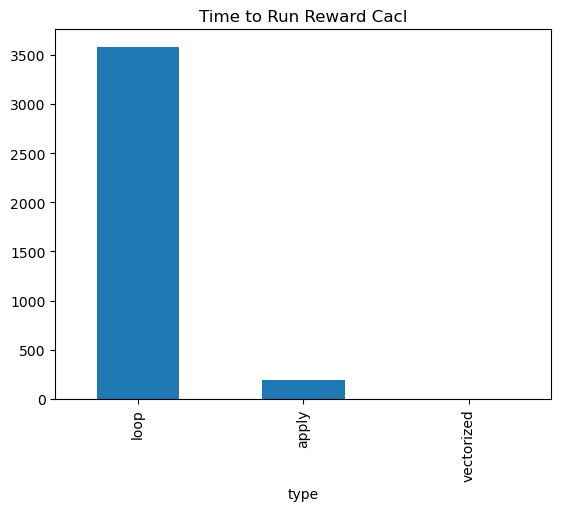

In [119]:
results = pd.DataFrame(
    [
        ['loop', 3580, 48.3],
        ['apply', 192, 6.34],
        ['vectorized', 1.36, 0.00896],
    ],
    columns=['type', 'mean', 'std'],
)
results.set_index('type')['mean'].plot(kind='bar', title='Time to Run Reward Cacl')